# Employee Earnings dataset in Boston

## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
from scipy.stats import skew
from scipy.stats import kurtosis 
pio.renderers.default = 'iframe'
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import scipy.stats as stats
from scipy.stats import spearmanr
import re, os, glob
from xgboost import XGBRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

## Loading the Dataset of five years 2018-2022

In [3]:
df1 = pd.read_csv("2022.csv", encoding='ISO-8859-1').assign(year=2022)
df2 = pd.read_csv("2021.csv", encoding='ISO-8859-1').assign(year=2021)
df3 = pd.read_csv("2020.csv", encoding='ISO-8859-1').assign(year=2020)
df4 = pd.read_csv("2019.csv", encoding='ISO-8859-1').assign(year=2019)
df5 = pd.read_csv("2018.csv", encoding='ISO-8859-1').assign(year=2018)
df1.rename(columns={'TOTAL_ GROSS': 'TOTAL_GROSS'}, inplace=True)
df2.rename(columns={'QUINN_EDUCATION_INCENTIVE': 'QUINN_EDUCATION'}, inplace=True)
df3.rename(columns={' REGULAR ': 'REGULAR', ' RETRO ': 'RETRO', ' OTHER ': 'OTHER', ' OVERTIME ': 'OVERTIME', ' INJURED ': 'INJURED', ' DETAIL ': 'DETAIL', ' QUINN / EDUCATION INCENTIVE ': 'QUINN_EDUCATION', ' TOTAL EARNINGS ': 'TOTAL_GROSS', 'POSTAL': 'POSTAL'}, inplace=True)
df4.rename(columns={' REGULAR ': 'REGULAR', ' RETRO ': 'RETRO', ' OTHER ': 'OTHER', ' OVERTIME ': 'OVERTIME', ' INJURED ': 'INJURED', ' DETAIL ': 'DETAIL', ' QUINN/EDUCATION INCENTIVE ': 'QUINN_EDUCATION', 'TOTAL EARNINGS': 'TOTAL_GROSS', 'POSTAL': 'POSTAL'}, inplace=True)
df5.rename(columns={'QUINN/EDUCATION INCENTIVE': 'QUINN_EDUCATION', 'TOTAL EARNINGS' : 'TOTAL_GROSS'}, inplace=True)
dfs = [df5, df4,df3, df2, df1]
final_df = pd.concat(dfs, ignore_index=True)
final_df

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,POSTAL,year
0,"Williams,David C.",Boston Police Department,Police Officer,"95,184.68",NaN,"503,025.78","45,176.88","5,307.62","24,610.00","4,375.69","677,680.65",02356,2018
1,"Earley,John W",Boston Police Department,Police Lieutenant,"26,130.54","13,001.47","204,120.61",668.36,NaN,440.00,"6,532.63","250,893.61",02131,2018
2,"Bucelewicz,Helen",Boston Police Department,Police Officer,"8,676.89",NaN,"200,000.00",NaN,NaN,NaN,NaN,"208,676.89",02135,2018
3,"Evans,William B",Boston Police Department,Commissioner (Bpd),"149,999.93","3,461.56","165,858.44",NaN,NaN,NaN,NaN,"319,319.93",02127,2018
4,"Jones,Ronnie C",Boston Police Department,Police Officer,"462,149.98",NaN,"114,973.46",NaN,NaN,NaN,NaN,"577,123.44",02126,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114526,"wheeler,Stephen clifford",Boston Cntr - Youth & Families,Lifeguard I,42.01,NaN,NaN,NaN,NaN,NaN,NaN,42.01,02129,2022
114527,"Harris,Gloria",BPS Office Of Budget Mgmt,Attendant,24.23,NaN,NaN,NaN,NaN,NaN,NaN,24.23,02136,2022
114528,"Jackson,Wanita Tina",Boston Police Department,School Traffic Supv,23.68,NaN,NaN,NaN,NaN,NaN,NaN,23.68,02119,2022
114529,"Paul,Desmond",BPS Substitute Teachers/Nurs,Substitute Teacher HE,21.28,NaN,NaN,NaN,NaN,NaN,NaN,21.28,02119,2022


## Data Inspection

In [4]:
final_df.isnull().sum()

NAME                   6
DEPARTMENT_NAME        6
TITLE                  6
REGULAR             3505
RETRO              73740
OTHER              34431
OVERTIME           63954
INJURED            85810
DETAIL             82588
QUINN_EDUCATION    85730
TOTAL_GROSS            6
POSTAL                99
year                   0
dtype: int64

In [5]:
columns_to_numeric = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_GROSS','year' ]
final_df[columns_to_numeric] = final_df[columns_to_numeric].apply(pd.to_numeric, errors='coerce')
final_df

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,POSTAL,year
0,"Williams,David C.",Boston Police Department,Police Officer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02356,2018
1,"Earley,John W",Boston Police Department,Police Lieutenant,NaN,NaN,NaN,668.36,NaN,440.0,NaN,NaN,02131,2018
2,"Bucelewicz,Helen",Boston Police Department,Police Officer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02135,2018
3,"Evans,William B",Boston Police Department,Commissioner (Bpd),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02127,2018
4,"Jones,Ronnie C",Boston Police Department,Police Officer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02126,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114526,"wheeler,Stephen clifford",Boston Cntr - Youth & Families,Lifeguard I,42.01,NaN,NaN,NaN,NaN,NaN,NaN,42.01,02129,2022
114527,"Harris,Gloria",BPS Office Of Budget Mgmt,Attendant,24.23,NaN,NaN,NaN,NaN,NaN,NaN,24.23,02136,2022
114528,"Jackson,Wanita Tina",Boston Police Department,School Traffic Supv,23.68,NaN,NaN,NaN,NaN,NaN,NaN,23.68,02119,2022
114529,"Paul,Desmond",BPS Substitute Teachers/Nurs,Substitute Teacher HE,21.28,NaN,NaN,NaN,NaN,NaN,NaN,21.28,02119,2022


In [6]:
final_df['RETRO'].fillna(0, inplace=True)
final_df['INJURED'].fillna(0, inplace=True)
final_df['OTHER'].fillna(0, inplace=True)
final_df['REGULAR'].fillna(0, inplace=True)
final_df['OVERTIME'].fillna(0, inplace=True)
final_df['DETAIL'].fillna(0, inplace=True)
final_df['QUINN_EDUCATION'].fillna(0, inplace=True)
final_df['NAME'].fillna('Unknown', inplace=True)
final_df['DEPARTMENT_NAME'].fillna('Not Assigned', inplace=True)
final_df['TITLE'].fillna('Not Specified', inplace=True)
gross_code = final_df['TOTAL_GROSS'].mode().iloc[0]
final_df['TOTAL_GROSS'].fillna(gross_code, inplace=True)
postal_code = final_df['POSTAL'].mode().iloc[0]
final_df['POSTAL'].fillna(postal_code, inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114531 entries, 0 to 114530
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NAME             114531 non-null  object 
 1   DEPARTMENT_NAME  114531 non-null  object 
 2   TITLE            114531 non-null  object 
 3   REGULAR          114531 non-null  float64
 4   RETRO            114531 non-null  float64
 5   OTHER            114531 non-null  float64
 6   OVERTIME         114531 non-null  float64
 7   INJURED          114531 non-null  float64
 8   DETAIL           114531 non-null  float64
 9   QUINN_EDUCATION  114531 non-null  float64
 10  TOTAL_GROSS      114531 non-null  float64
 11  POSTAL           114531 non-null  object 
 12  year             114531 non-null  int64  
dtypes: float64(8), int64(1), object(4)
memory usage: 11.4+ MB


In [7]:
final_df.duplicated().sum()

7

In [8]:
duplicate_columns = []
for column in final_df.columns:
    if final_df[column].duplicated(keep=False).any():
        duplicate_columns.append(column)
duplicate_rows = final_df.duplicated(subset=duplicate_columns, keep='first')
final_df = final_df[~duplicate_rows]
final_df.reset_index(drop=True, inplace=True)
final_df

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,POSTAL,year
0,"Williams,David C.",Boston Police Department,Police Officer,0.00,0.0,0.0,0.00,0.0,0.0,0.0,863.59,02356,2018
1,"Earley,John W",Boston Police Department,Police Lieutenant,0.00,0.0,0.0,668.36,0.0,440.0,0.0,863.59,02131,2018
2,"Bucelewicz,Helen",Boston Police Department,Police Officer,0.00,0.0,0.0,0.00,0.0,0.0,0.0,863.59,02135,2018
3,"Evans,William B",Boston Police Department,Commissioner (Bpd),0.00,0.0,0.0,0.00,0.0,0.0,0.0,863.59,02127,2018
4,"Jones,Ronnie C",Boston Police Department,Police Officer,0.00,0.0,0.0,0.00,0.0,0.0,0.0,863.59,02126,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114519,"wheeler,Stephen clifford",Boston Cntr - Youth & Families,Lifeguard I,42.01,0.0,0.0,0.00,0.0,0.0,0.0,42.01,02129,2022
114520,"Harris,Gloria",BPS Office Of Budget Mgmt,Attendant,24.23,0.0,0.0,0.00,0.0,0.0,0.0,24.23,02136,2022
114521,"Jackson,Wanita Tina",Boston Police Department,School Traffic Supv,23.68,0.0,0.0,0.00,0.0,0.0,0.0,23.68,02119,2022
114522,"Paul,Desmond",BPS Substitute Teachers/Nurs,Substitute Teacher HE,21.28,0.0,0.0,0.00,0.0,0.0,0.0,21.28,02119,2022


In [9]:
final_df['DEPARTMENT_NAME'].value_counts()

Boston Police Department        15719
Boston Fire Department           8607
BPS Substitute Teachers/Nurs     4229
BPS Special Education            4206
BPS Facility Management          3001
                                ...  
BPS Withthrop Elementary            1
DEPARTMENT_NAME                     1
DND Neighborhood Development        1
Fenway High School                  1
BPS Summer School Program           1
Name: DEPARTMENT_NAME, Length: 259, dtype: int64

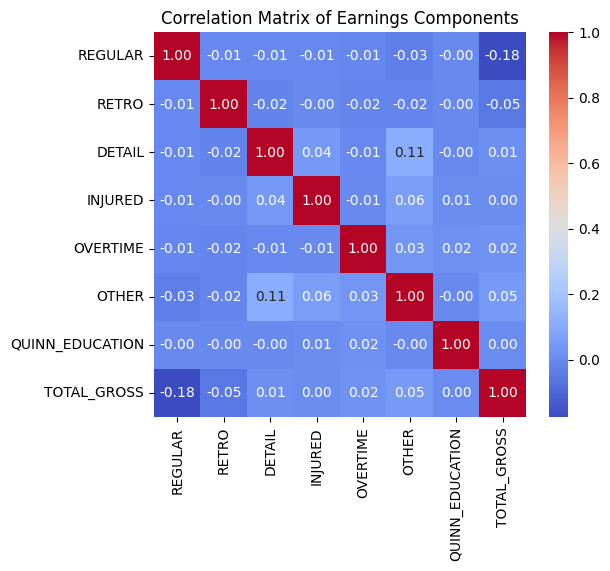

In [10]:
earnings_components = final_df[['REGULAR','RETRO','DETAIL','INJURED', 'OVERTIME', 'OTHER','QUINN_EDUCATION', 'TOTAL_GROSS']]
correlation_matrix = earnings_components.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Earnings Components')
plt.show()

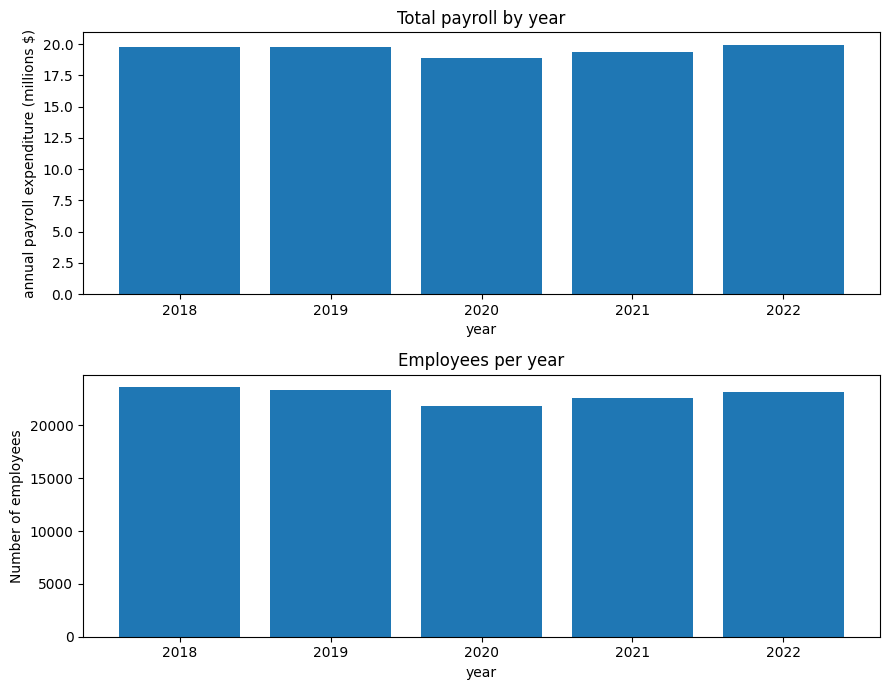

In [11]:
total_payroll = final_df.groupby(final_df['year'])[['REGULAR', 'TOTAL_GROSS', 'NAME']]\
                        .agg({'REGULAR': np.sum, 'TOTAL_GROSS': np.sum, 'NAME': 'count'})\
                        .reset_index()\
                        .set_index('year')
total_payroll['epc'] = total_payroll['TOTAL_GROSS'] / total_payroll['NAME'] # average total earnings per capita
total_payroll['rpc'] = total_payroll['REGULAR'] / total_payroll['NAME'] # average regular earnings per capita
total_payroll = total_payroll.reset_index()

# create subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(9,7))

x = total_payroll['year']

# Total payroll by year
ax1.bar(x, total_payroll['TOTAL_GROSS']/1000000)
ax1.set_xlabel('year')
ax1.set_ylabel('annual payroll expenditure (millions $)')
ax1.set_title('Total payroll by year')

# Employees per year
ax2.bar(x, total_payroll['NAME'])
ax2.set_xlabel('year')
ax2.set_ylabel('Number of employees')
ax2.set_title('Employees per year')


plt.tight_layout()
plt.savefig('test.png', dpi=300)
plt.show()

In [12]:
# get top 10 titles by number of employees
titles_top10 = final_df.groupby('TITLE').agg('size')\
                .sort_values(ascending=False)\
                .index[:10]

# get top 10 departments by number of employees

departments_top10 = final_df\
                .groupby('DEPARTMENT_NAME')\
                .agg('size')\
                .sort_values(ascending=False)\
                .index[:10]
print(titles_top10)
print(departments_top10)

Index(['Teacher', 'Paraprofessional', 'Police Officer', 'Fire Fighter',
       'Part-Time Cafeteria Attendant', 'Substitute Teacher',
       'Lunch Hour Monitors', 'Police Detective', 'Substitute Teacher HE',
       'Cab Monitor'],
      dtype='object', name='TITLE')
Index(['Boston Police Department', 'Boston Fire Department',
       'BPS Substitute Teachers/Nurs', 'BPS Special Education',
       'BPS Facility Management', 'BPS Transportation',
       'Boston Public Library', 'Boston Cntr - Youth & Families',
       'Public Works Department', 'Traffic Division'],
      dtype='object', name='DEPARTMENT_NAME')


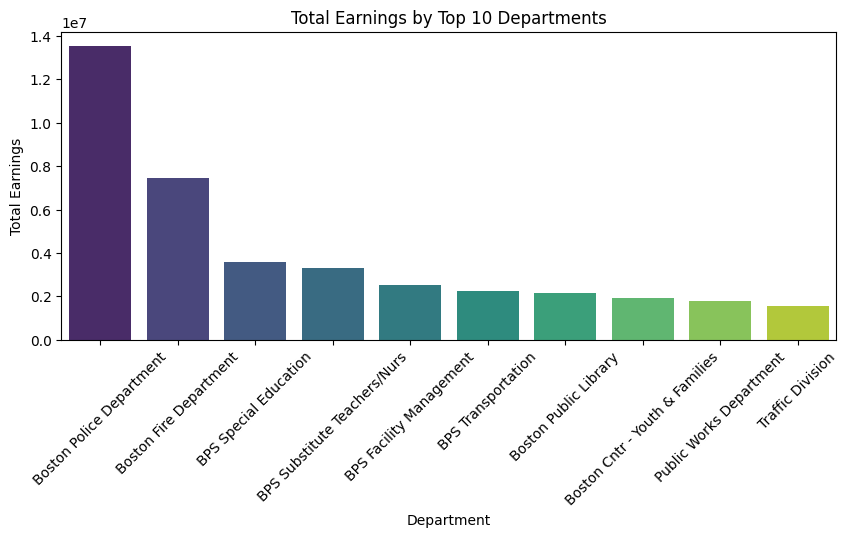

In [13]:
top_departments = final_df.groupby('DEPARTMENT_NAME')['TOTAL_GROSS'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(data=top_departments, x='DEPARTMENT_NAME', y='TOTAL_GROSS',hue='DEPARTMENT_NAME', palette='viridis')
plt.title('Total Earnings by Top 10 Departments')
plt.xlabel('Department')
plt.ylabel('Total Earnings')
plt.xticks(rotation=45)
plt.show()


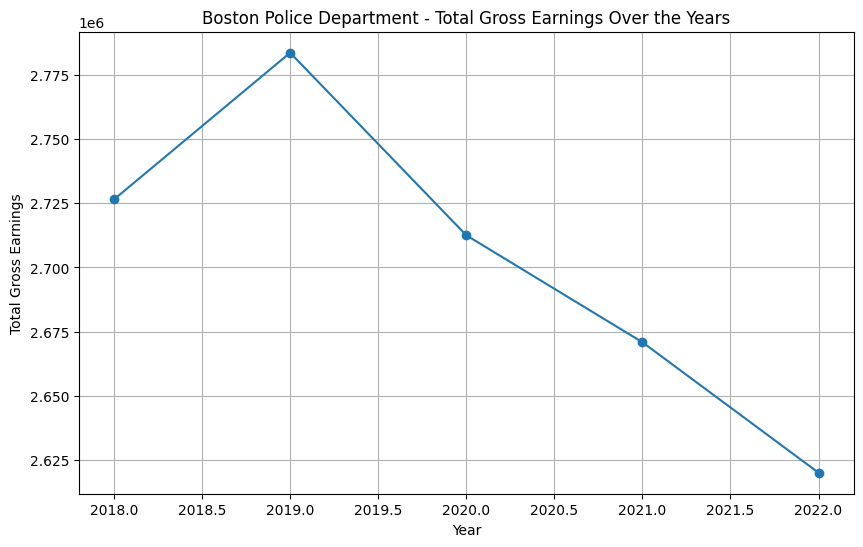

In [14]:
YEAR_COLUMN = 'year'
TOTAL_GROSS_COLUMN = 'TOTAL_GROSS'
# Aggregate total gross earnings by year for the Boston Police Department
police_earnings_by_year = final_df[final_df['DEPARTMENT_NAME'] == 'Boston Police Department'].groupby(YEAR_COLUMN)[TOTAL_GROSS_COLUMN].sum()
# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(police_earnings_by_year.index, police_earnings_by_year.values, marker='o', linestyle='-')
plt.title('Boston Police Department - Total Gross Earnings Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross Earnings')
plt.grid(True)
plt.show()


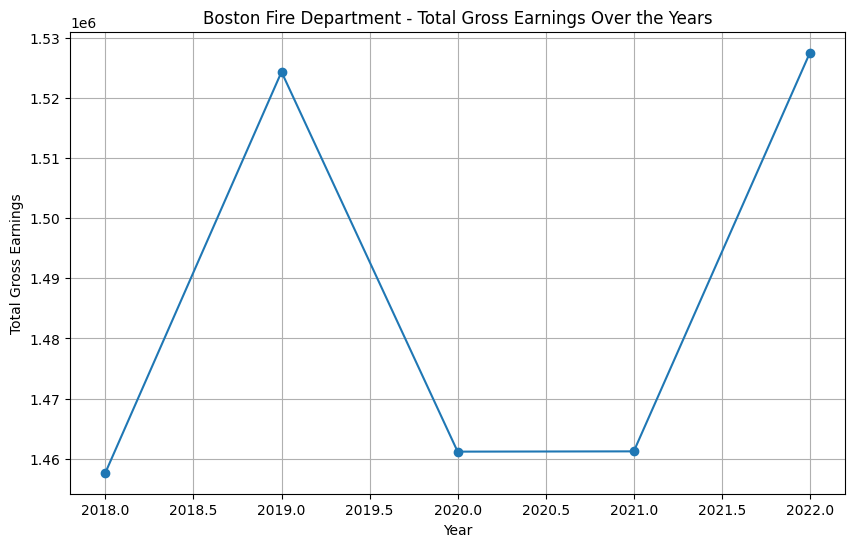

In [15]:
YEAR_COLUMN = 'year'
TOTAL_GROSS_COLUMN = 'TOTAL_GROSS'
# Aggregate total gross earnings by year for the Boston Police Department
police_earnings_by_year = final_df[final_df['DEPARTMENT_NAME'] == 'Boston Fire Department'].groupby(YEAR_COLUMN)[TOTAL_GROSS_COLUMN].sum()
# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(police_earnings_by_year.index, police_earnings_by_year.values, marker='o', linestyle='-')
plt.title('Boston Fire Department - Total Gross Earnings Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross Earnings')
plt.grid(True)
plt.show()

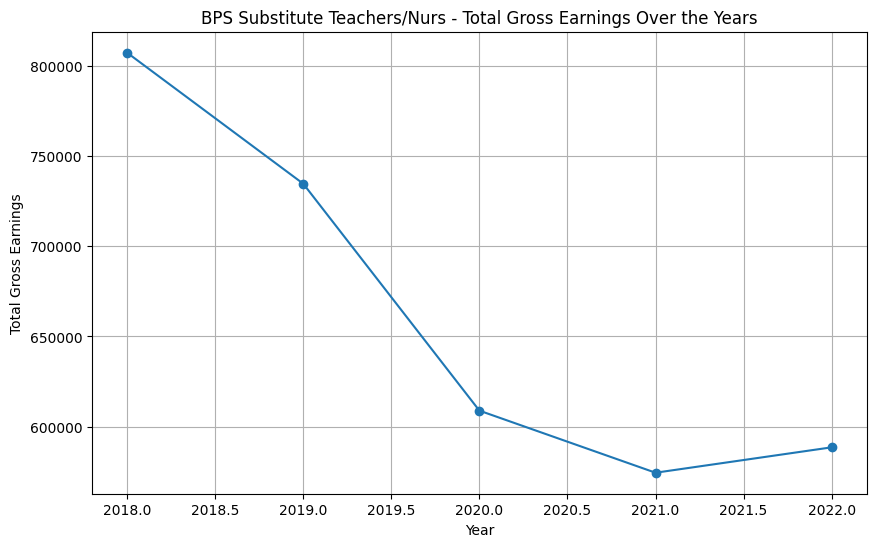

In [16]:
YEAR_COLUMN = 'year'
TOTAL_GROSS_COLUMN = 'TOTAL_GROSS'
# Aggregate total gross earnings by year for the Boston Police Department
police_earnings_by_year = final_df[final_df['DEPARTMENT_NAME'] == 'BPS Substitute Teachers/Nurs'].groupby(YEAR_COLUMN)[TOTAL_GROSS_COLUMN].sum()
# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(police_earnings_by_year.index, police_earnings_by_year.values, marker='o', linestyle='-')
plt.title('BPS Substitute Teachers/Nurs - Total Gross Earnings Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross Earnings')
plt.grid(True)
plt.show()

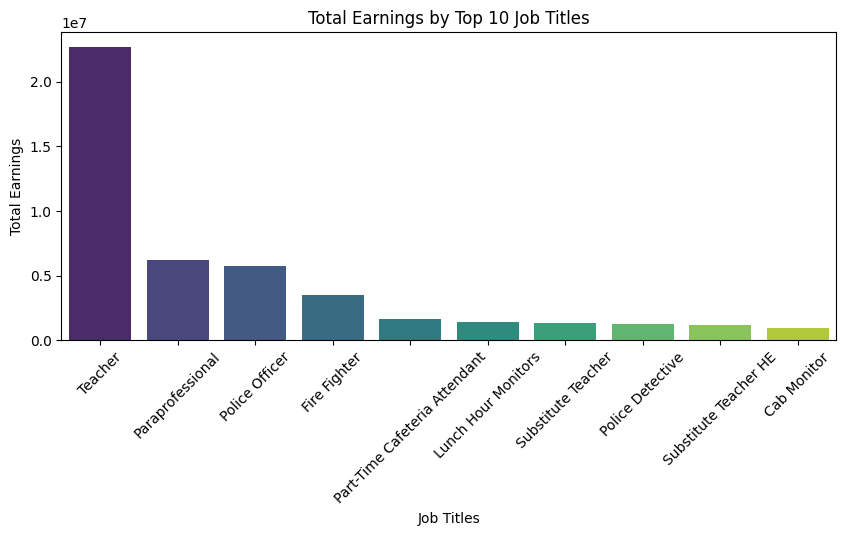

In [17]:
top_titles = final_df.groupby('TITLE')['TOTAL_GROSS'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(data=top_titles, x='TITLE', y='TOTAL_GROSS',hue='TITLE', palette='viridis')
plt.title('Total Earnings by Top 10 Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Total Earnings')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

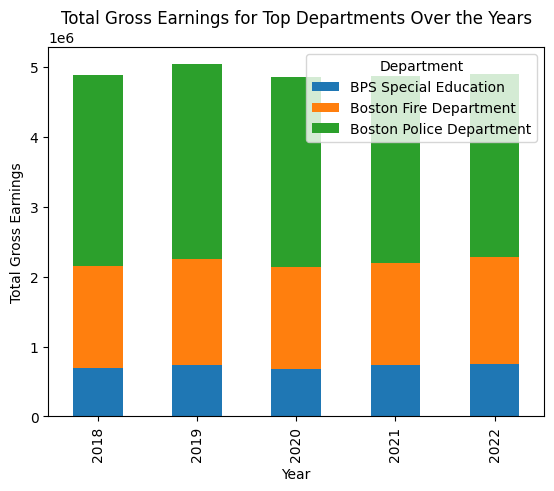

In [18]:
YEAR_COLUMN = 'year'
DEPARTMENT_COLUMN = 'DEPARTMENT_NAME'
TOTAL_GROSS_COLUMN = 'TOTAL_GROSS'

# Filter for the top three earning departments
top_departments = ['Boston Police Department', 'Boston Fire Department', 'BPS Special Education']
earnings_top_departments = final_df[final_df[DEPARTMENT_COLUMN].isin(top_departments)]

# Pivot the data for easy plotting
pivot_table = pd.pivot_table(earnings_top_departments, values=TOTAL_GROSS_COLUMN, index=YEAR_COLUMN, columns=DEPARTMENT_COLUMN, aggfunc='sum')

# Plot the bar plot
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Total Gross Earnings for Top Departments Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross Earnings')
plt.legend(title='Department')
plt.show()

<Figure size 1200x800 with 0 Axes>

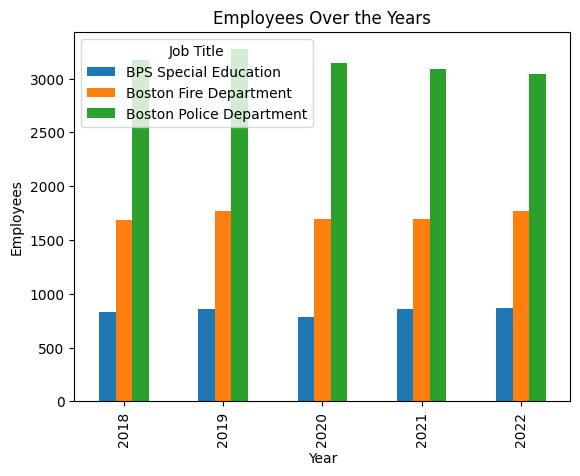

In [19]:
YEAR_COLUMN = 'year'
TITLE_COLUMN = 'DEPARTMENT_NAME'
NAME_COLUMN = 'NAME'

# Filter for the top three earning job titles
top_titles = ['Boston Police Department', 'Boston Fire Department', 'BPS Special Education']
earnings_top_titles = final_df[final_df[TITLE_COLUMN].isin(top_titles)]

# Pivot the data for easy plotting
pivot_table = pd.pivot_table(earnings_top_titles, values=NAME_COLUMN , index=YEAR_COLUMN, columns=TITLE_COLUMN, aggfunc='count')

# Plot the line chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar')

plt.title('Employees Over the Years')
plt.xlabel('Year')
plt.ylabel('Employees')
plt.legend(title='Job Title')
plt.show()

<Figure size 1200x800 with 0 Axes>

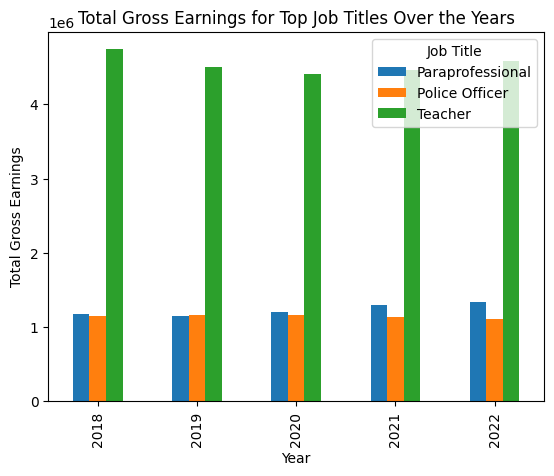

In [20]:
YEAR_COLUMN = 'year'
TITLE_COLUMN = 'TITLE'
TOTAL_GROSS_COLUMN = 'TOTAL_GROSS'

# Filter for the top three earning job titles
top_titles = ['Teacher', 'Paraprofessional', 'Police Officer']
earnings_top_titles = final_df[final_df[TITLE_COLUMN].isin(top_titles)]

# Pivot the data for easy plotting
pivot_table = pd.pivot_table(earnings_top_titles, values=TOTAL_GROSS_COLUMN, index=YEAR_COLUMN, columns=TITLE_COLUMN, aggfunc='sum')

# Plot the line chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar')
plt.title('Total Gross Earnings for Top Job Titles Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross Earnings')
plt.legend(title='Job Title')
plt.show()

<Figure size 1200x800 with 0 Axes>

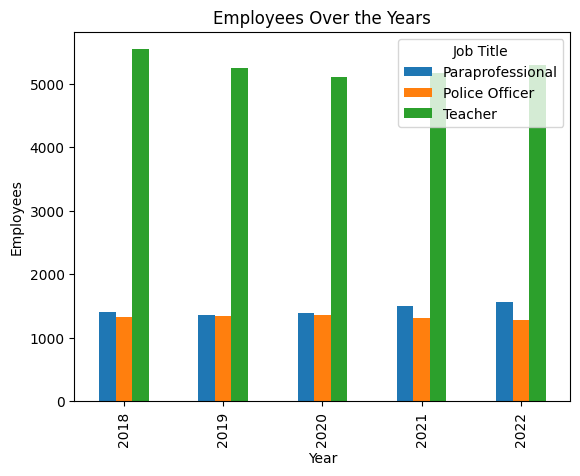

In [21]:
YEAR_COLUMN = 'year'
TITLE_COLUMN = 'TITLE'
NAME_COLUMN = 'NAME'

# Filter for the top three earning job titles
top_titles = ['Teacher', 'Paraprofessional', 'Police Officer']
earnings_top_titles = final_df[final_df[TITLE_COLUMN].isin(top_titles)]

# Pivot the data for easy plotting
pivot_table = pd.pivot_table(earnings_top_titles, values=NAME_COLUMN , index=YEAR_COLUMN, columns=TITLE_COLUMN, aggfunc='count')

# Plot the line chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar')

plt.title('Employees Over the Years')
plt.xlabel('Year')
plt.ylabel('Employees')
plt.legend(title='Job Title')
plt.show()

<Figure size 500x800 with 0 Axes>

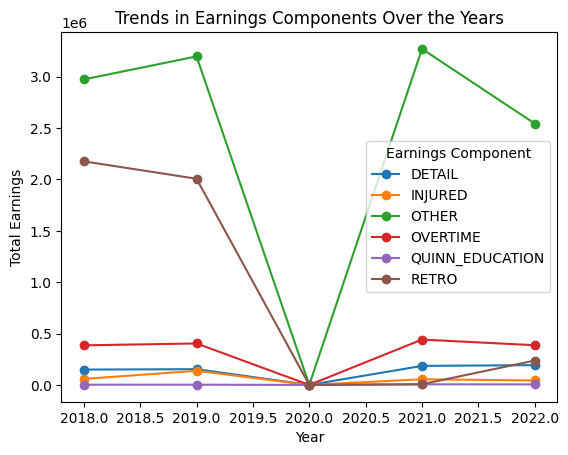

In [22]:
YEAR_COLUMN = 'year'
COLUMNS_TO_PLOT = ['RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION']

# Pivot the data for easy plotting
pivot_table = pd.pivot_table(final_df, values=COLUMNS_TO_PLOT, index=YEAR_COLUMN, aggfunc='sum')

# Plot the line chart
plt.figure(figsize=(5, 8))
pivot_table.plot(kind='line', marker='o')
plt.title('Trends in Earnings Components Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Earnings')
plt.legend(title='Earnings Component')
plt.show()

# XGBoost

In [23]:
target_column = 'TOTAL_GROSS'
features = ['RETRO', 'DETAIL', 'OVERTIME', 'INJURED', 'QUINN_EDUCATION', 'REGULAR']
X = final_df[features]
y = final_df[target_column]

# Selecting the top 10 departments
top_10_departments = final_df['DEPARTMENT_NAME'].value_counts().nlargest(10).index
data_top_10 = final_df[final_df['DEPARTMENT_NAME'].isin(top_10_departments)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost Regressor
xgb_model = XGBRegressor(objective ='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)


# Calculate R2 score
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'R2 Score (XGBoost): {r2_xgb}')



R2 Score (XGBoost): 0.35420045026127134


# Hyper Parameter tuning for XGBoost

R2 Score (XGBoost): 0.3585898942848931


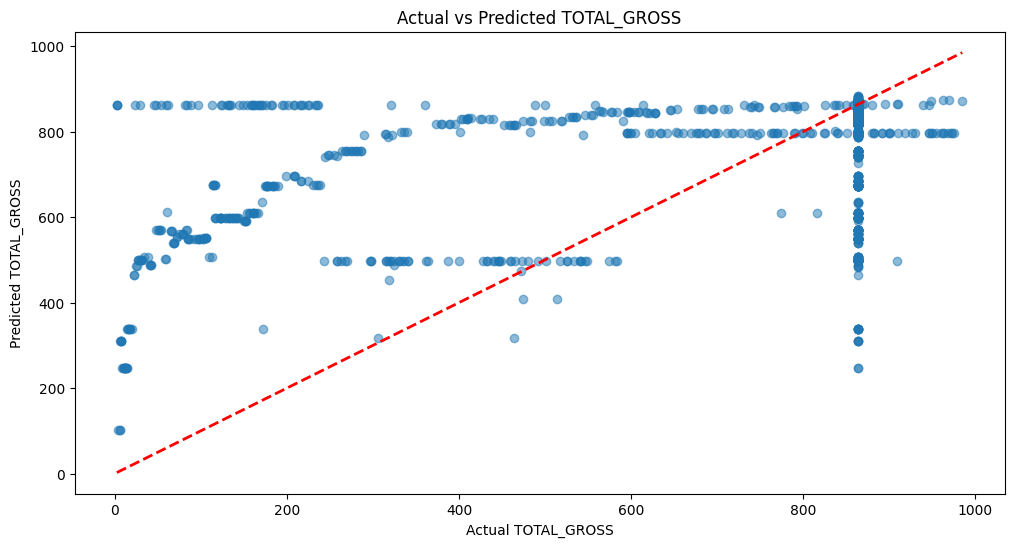

In [24]:
target_column = 'TOTAL_GROSS'
features = ['RETRO', 'DETAIL', 'OVERTIME', 'INJURED', 'QUINN_EDUCATION', 'REGULAR']
X = final_df[features]
y = final_df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model

r2_xgb = r2_score(y_test, y_pred_xgb)


print(f'R2 Score (XGBoost): {r2_xgb}')

# Plot actual vs predicted values using a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title(f'Actual vs Predicted {target_column}')
plt.xlabel(f'Actual {target_column}')
plt.ylabel(f'Predicted {target_column}')
plt.show()


# Time series 

# first step is to check whether the timeseries is stationary or not?

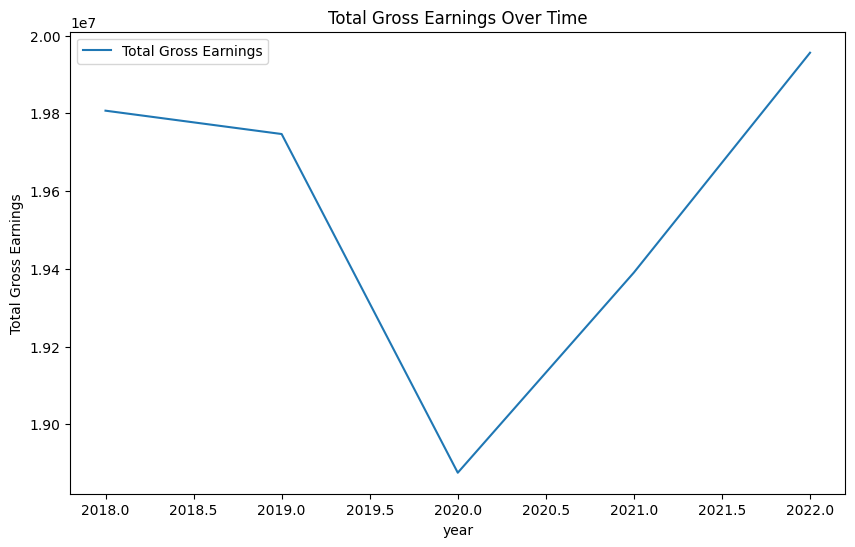

ADF Statistic: -1.429897075116041
p-value: 0.5678621575041571
Critical Values:
1%: -7.355440625
5%: -4.474365000000001
10%: -3.1269325
Is the time series stationary? No


In [25]:
from statsmodels.tsa.stattools import adfuller

time_column = 'year'
target_column = 'TOTAL_GROSS'
total_gross_series = final_df.groupby(time_column)[target_column].sum()

# Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(total_gross_series, label='Total Gross Earnings')
plt.title('Total Gross Earnings Over Time')
plt.xlabel(time_column)
plt.ylabel('Total Gross Earnings')
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test
result = adfuller(total_gross_series)

# Extract and print the ADF statistics, p-value, and critical values
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

# Check stationarity based on the p-value
if p_value <= 0.05:
    print('Is the time series stationary? Yes')
else:
    print('Is the time series stationary? No')

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_GROSS,POSTAL,year
0,"Williams,David C.",Boston Police Department,Police Officer,0.00,0.0,0.0,0.00,0.0,0.0,0.0,863.59,02356,2018
1,"Earley,John W",Boston Police Department,Police Lieutenant,0.00,0.0,0.0,668.36,0.0,440.0,0.0,863.59,02131,2018
2,"Bucelewicz,Helen",Boston Police Department,Police Officer,0.00,0.0,0.0,0.00,0.0,0.0,0.0,863.59,02135,2018
3,"Evans,William B",Boston Police Department,Commissioner (Bpd),0.00,0.0,0.0,0.00,0.0,0.0,0.0,863.59,02127,2018
4,"Jones,Ronnie C",Boston Police Department,Police Officer,0.00,0.0,0.0,0.00,0.0,0.0,0.0,863.59,02126,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114519,"wheeler,Stephen clifford",Boston Cntr - Youth & Families,Lifeguard I,42.01,0.0,0.0,0.00,0.0,0.0,0.0,42.01,02129,2022
114520,"Harris,Gloria",BPS Office Of Budget Mgmt,Attendant,24.23,0.0,0.0,0.00,0.0,0.0,0.0,24.23,02136,2022
114521,"Jackson,Wanita Tina",Boston Police Department,School Traffic Supv,23.68,0.0,0.0,0.00,0.0,0.0,0.0,23.68,02119,2022
114522,"Paul,Desmond",BPS Substitute Teachers/Nurs,Substitute Teacher HE,21.28,0.0,0.0,0.00,0.0,0.0,0.0,21.28,02119,2022


# making the timeseries data stationary using box-cox 

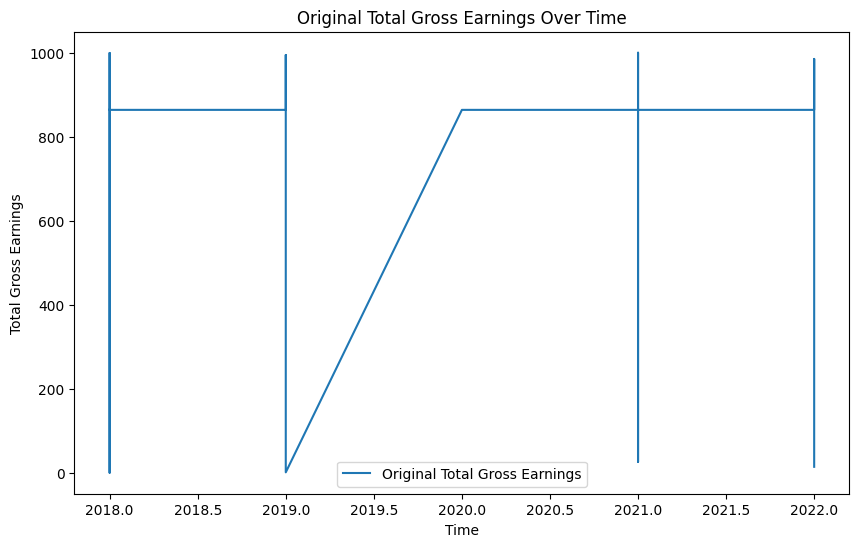

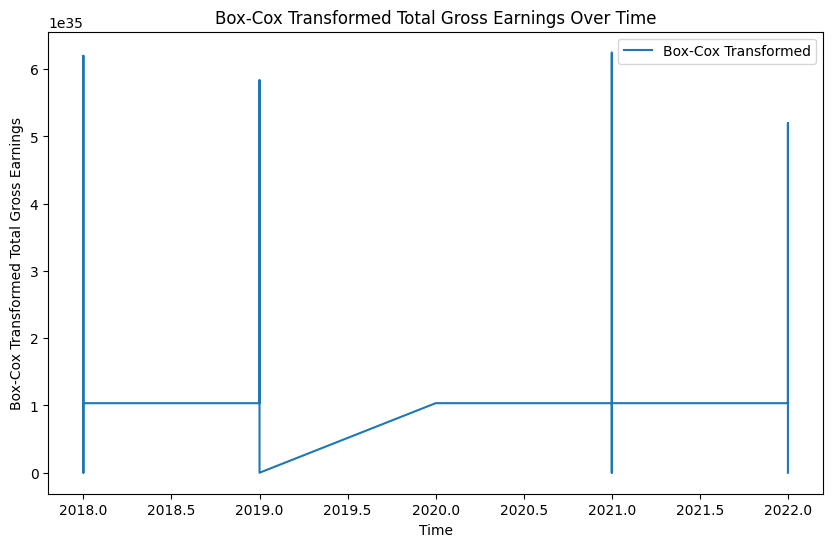

ADF Statistic (Box-Cox Transformed): -2.2011966586636627
p-value (Box-Cox Transformed): 0.20581142550976333
Critical Values (Box-Cox Transformed):
1%: -3.430407137523232
5%: -2.861565253925235
10%: -2.566783441774587


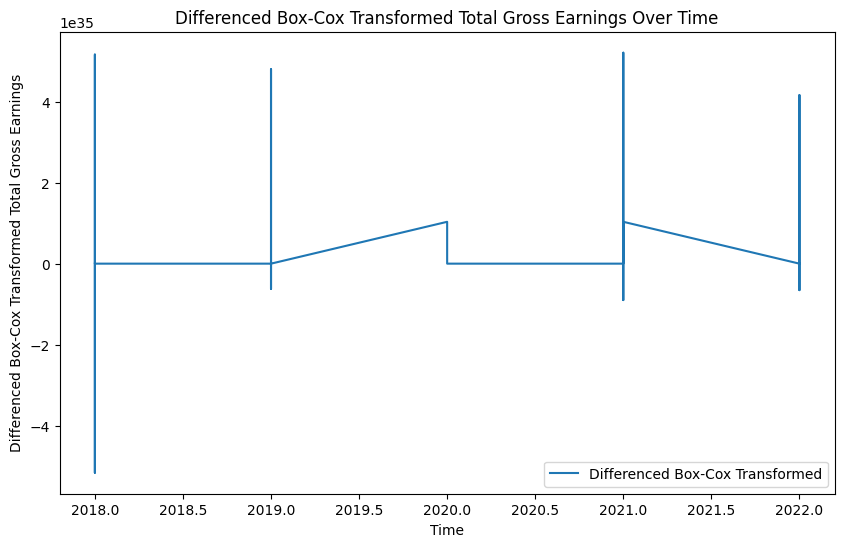

ADF Statistic (Differenced Box-Cox Transformed): -56.926905560171654
p-value (Differenced Box-Cox Transformed): 0.0
Critical Values (Differenced Box-Cox Transformed):
1%: -3.430407137523232
5%: -2.861565253925235
10%: -2.566783441774587


In [48]:
df = final_df
time_column = 'year'
total_gross_column = 'TOTAL_GROSS'
# Visualize the original time series
plt.figure(figsize=(10, 6))
plt.plot(df[time_column], df[total_gross_column], label='Original Total Gross Earnings')
plt.title('Original Total Gross Earnings Over Time')
plt.xlabel('Time')
plt.ylabel('Total Gross Earnings')
plt.legend()
plt.show()


# Box-Cox Transformation
df['boxcox'], lam = boxcox(df[total_gross_column])

# Visualize the Box-Cox transformed time series
plt.figure(figsize=(10, 6))
plt.plot(df[time_column], df['boxcox'], label='Box-Cox Transformed')
plt.title('Box-Cox Transformed Total Gross Earnings Over Time')
plt.xlabel('Time')
plt.ylabel('Box-Cox Transformed Total Gross Earnings')
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test on the Box-Cox transformed time series
result_boxcox = adfuller(df['boxcox'].dropna())
adf_statistic_boxcox = result_boxcox[0]
p_value_boxcox = result_boxcox[1]
critical_values_boxcox = result_boxcox[4]

print(f'ADF Statistic (Box-Cox Transformed): {adf_statistic_boxcox}')
print(f'p-value (Box-Cox Transformed): {p_value_boxcox}')
print('Critical Values (Box-Cox Transformed):')
for key, value in critical_values_boxcox.items():
    print(f'{key}: {value}')

# Differencing the Box-Cox transformed time series
df['diff_boxcox'] = df['boxcox'].diff()

# Visualize the differenced Box-Cox transformed time series
plt.figure(figsize=(10, 6))
plt.plot(df[time_column].iloc[1:], df['diff_boxcox'].dropna(), label='Differenced Box-Cox Transformed')
plt.title('Differenced Box-Cox Transformed Total Gross Earnings Over Time')
plt.xlabel('Time')
plt.ylabel('Differenced Box-Cox Transformed Total Gross Earnings')
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test on the differenced Box-Cox transformed time series
result_diff_boxcox = adfuller(df['diff_boxcox'].dropna())
adf_statistic_diff_boxcox = result_diff_boxcox[0]
p_value_diff_boxcox = result_diff_boxcox[1]
critical_values_diff_boxcox = result_diff_boxcox[4]

print(f'ADF Statistic (Differenced Box-Cox Transformed): {adf_statistic_diff_boxcox}')
print(f'p-value (Differenced Box-Cox Transformed): {p_value_diff_boxcox}')
print('Critical Values (Differenced Box-Cox Transformed):')
for key, value in critical_values_diff_boxcox.items():
    print(f'{key}: {value}')


# Auto Correlation and partial auto correlation plots

<Figure size 1200x600 with 0 Axes>

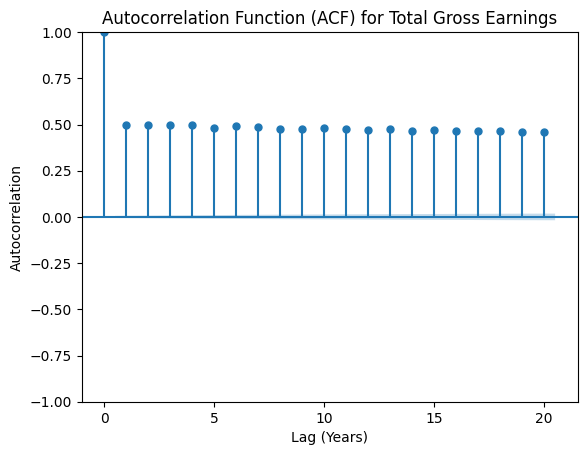

<Figure size 1200x600 with 0 Axes>

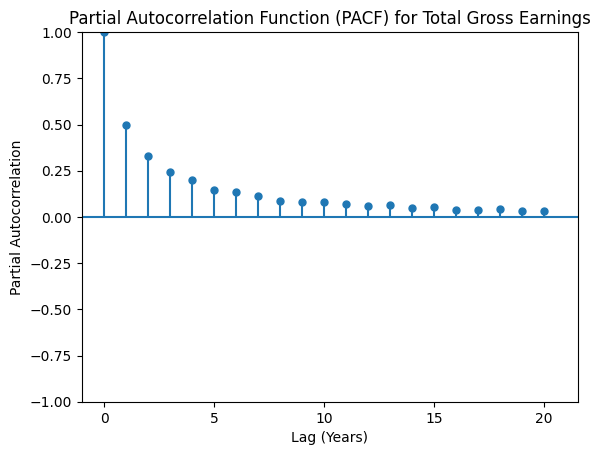

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
total_gross_series = final_df['TOTAL_GROSS']
# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(total_gross_series, lags=20, title='Autocorrelation Function (ACF) for Total Gross Earnings')
plt.xlabel('Lag (Years)')
plt.ylabel('Autocorrelation')
plt.show()

# Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(total_gross_series, lags=20, title='Partial Autocorrelation Function (PACF) for Total Gross Earnings')
plt.xlabel('Lag (Years)')
plt.ylabel('Partial Autocorrelation')
plt.show()


# SARIMAX MODEL IMPLEMENTATION

Optimal Model Order: (4, 1, 1) (0, 0, 0, 0)


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Mean Squared Error (MSE): 1998.7660904282463
Root Mean Squared Error (RMSE): 44.7075618931322


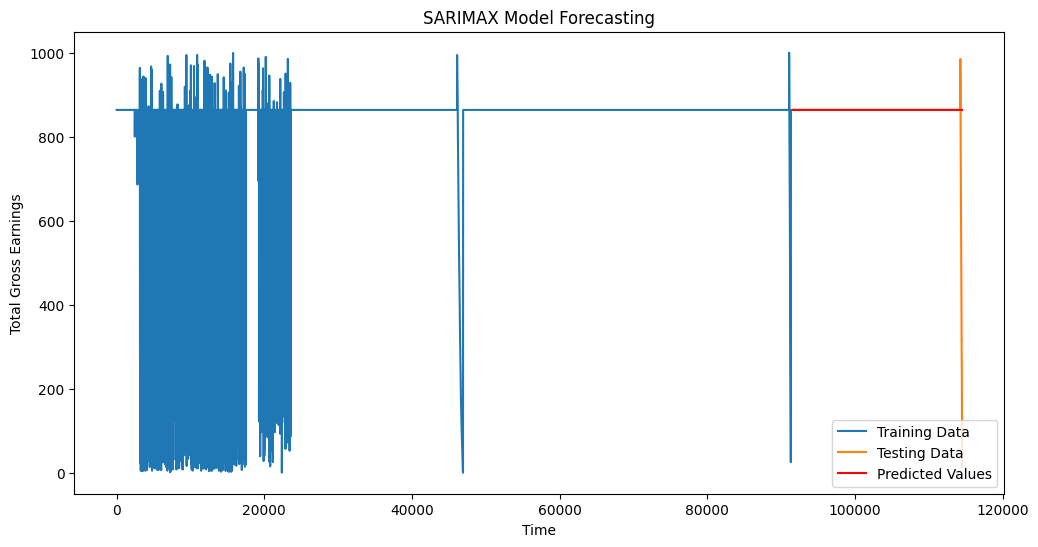

In [51]:
total_gross_series = df['TOTAL_GROSS']
# Split the data into training and testing sets
train_size = int(len(total_gross_series) * 0.8)
train, test = total_gross_series[0:train_size], total_gross_series[train_size:]
# Use auto_arima for grid search
model = auto_arima(train, seasonal=True, suppress_warnings=True, stepwise=True)

# Print the optimal model order
print("Optimal Model Order:", model.order, model.seasonal_order)

# Build and fit the SARIMAX model with the optimal parameters
sarimax_model = SARIMAX(train, order=model.order, seasonal_order=model.seasonal_order)
results = sarimax_model.fit()

# Forecast using the fitted model
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)

# Extract predicted values and confidence intervals
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Evaluate the model on the test set
mse = mean_squared_error(test, predicted_values)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Testing Data')
plt.plot(predicted_values.index, predicted_values, color='red', label='Predicted Values')
plt.title('SARIMAX Model Forecasting')
plt.xlabel('Time')
plt.ylabel('Total Gross Earnings')
plt.legend()
plt.show()
